In [1]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import time
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, Flatten
from keras.layers import Dropout, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Load the dataset
data = pd.read_csv('E:\\SIMIN_NN\\Shervin\\df_cleaned5.csv')

In [3]:
#data.info()
data

,age,gendera,BMI,hypertensive,glucose,RBC,PH,EF,COPD,PT,Platelets,atrialfibrillation,CHD with no MI,Hyperlipemia,deficiencyanemias,depression
0,72,1,37.588179,0,114.636364,2.960000,7.230000,55,0,10.600000,305.100000,0,0,1,1,0
1,83,0,26.572634,0,149.000000,2.620000,7.268000,35,0,11.275000,204.200000,0,0,0,1,0
2,43,0,83.264629,0,128.250000,4.277500,7.370000,55,0,27.066667,216.375000,0,0,0,0,0
3,76,1,24.262293,1,98.333333,3.235000,7.310000,35,1,18.783333,273.000000,1,0,1,1,0
4,72,1,39.667426,1,105.600000,3.720000,7.169231,55,1,14.000000,140.250000,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,83,0,21.551321,0,262.000000,3.715000,7.310000,50,0,13.233333,286.250000,0,0,0,0,0
685,78,1,19.580651,1,93.000000,3.047778,7.460000,50,0,13.125000,410.555556,0,0,0,1,0
686,82,0,28.950609,1,160.250000,3.500000,7.430000,50,0,13.400000,498.250000,0,0,0,1,0
687,76,1,26.197235,0,89.000000,3.584000,7.240000,55,0,16.642857,139.900000,1,0,0,0,0


In [4]:
#Normalization
# PRIPARE DATA
MX_AGE = 120
MX_BMI = 105
MX_RBC = 7
MX_GLU = 450
MX_EF = 80
MX_PL = 1030 #1030
MX_PT = 75

data['age'] = data['age'] / MX_AGE 
data['BMI'] = data['BMI'] / MX_BMI
data['RBC'] = data['RBC'] / MX_RBC
data['glucose'] = data['glucose'] / MX_GLU
data['EF'] = data['EF'] / MX_EF
data['PH'] = data['PH'] - 7.0
# data['gendera'] = (data['gendera'] / 3 ) + 0.1
# data['hypertensive'] = (data['hypertensive'] / 3 ) + 0.1
# data['COPD'] = (data['COPD'] / 3 ) + 0.1
# data['CHD with no MI'] = (data['CHD with no MI'] / 3 ) + 0.1
# data['Hyperlipemia'] = (data['Hyperlipemia'] / 3 ) + 0.1
# data['deficiencyanemias'] = (data['deficiencyanemias'] / 3 ) + 0.1
# data['depression'] = (data['depression'] / 3 ) + 0.1



data['Platelets'] = data['Platelets'] / MX_PL
data['PT'] = data['PT'] / MX_PT
# Check the first few rows to confirm changes
data.head()



,age,gendera,BMI,hypertensive,glucose,RBC,PH,EF,COPD,PT,Platelets,atrialfibrillation,CHD with no MI,Hyperlipemia,deficiencyanemias,depression
0,0.600000,1,0.357983,0,0.254747,0.422857,0.230000,0.6875,0,0.141333,0.296214,0,0,1,1,0
1,0.691667,0,0.253073,0,0.331111,0.374286,0.268000,0.4375,0,0.150333,0.198252,0,0,0,1,0
2,0.358333,0,0.792996,0,0.285000,0.611071,0.370000,0.6875,0,0.360889,0.210073,0,0,0,0,0
3,0.633333,1,0.231069,1,0.218519,0.462143,0.310000,0.4375,1,0.250444,0.265049,1,0,1,1,0
4,0.600000,1,0.377785,1,0.234667,0.531429,0.169231,0.6875,1,0.186667,0.136165,0,0,1,0,0


In [5]:
# Load the dataframe
df_input = data

# Print the number of rows
row_count = len(df_input)
print(f"Total number of rows: {row_count}")

# Ask for the number of data needed for training
NN = int(input("How many data do you need for TEST(press Enter)? "))

# Check if NN is not greater than the total number of rows
if NN > row_count:
    print("Error: NN is greater than the total number of rows.")
else:
    # Splitting the dataframe
    train_df = df_input.iloc[:-NN] # or df_input.head(row_count - NN)
    test_df = df_input.iloc[-NN:] # or df_input.tail(NN)

    # Optionally, display the first few rows of each dataframe to verify
    print(row_count-NN,"\nTrain DataFrame:  Done!")
    #print(train_df.head())
    print(NN,"\nTest DataFrame:  Done!")
    #print(test_df.head())

Total number of rows: 689
How many data do you need for TEST(press Enter)? 50
639 
Train DataFrame:  Done!
50 
Test DataFrame:  Done!


In [6]:
# Assuming train_df and test_df have the same columns, we take the column names from train_df
columns = train_df.columns.tolist()

# Create checkboxes for input selection
input_checkboxes = [widgets.Checkbox(value=False, description=column) for column in columns]
output_checkboxes = [widgets.Checkbox(value=False, description=column) for column in columns]

input_box = widgets.VBox(input_checkboxes)
output_box = widgets.VBox(output_checkboxes)

# Function to handle button click event for input selection
def on_input_button_clicked(b):
    selected_input_columns = [cb.description for cb in input_checkboxes if cb.value]
    global input_df  # Use global to use this outside the function if required
    input_df = train_df[selected_input_columns].copy()
    print("Selected input columns:", selected_input_columns)

# Function to handle button click event for output selection
def on_output_button_clicked(b):
    selected_output_columns = [cb.description for cb in output_checkboxes if cb.value]
    global output_df  # Use global to use this outside the function if required
    output_df = train_df[selected_output_columns].copy()
    print("Selected output columns:", selected_output_columns)

input_button = widgets.Button(description="Select Input")
output_button = widgets.Button(description="Select Output")

input_button.on_click(on_input_button_clicked)
output_button.on_click(on_output_button_clicked)

display(widgets.Label('SELECT INPUT'), input_box, input_button)
display(widgets.Label('SELECT OUTPUT'), output_box, output_button)

Label(value='SELECT INPUT')

Button(description='Select Input', style=ButtonStyle())

Label(value='SELECT OUTPUT')

Button(description='Select Output', style=ButtonStyle())

Selected input columns: ['age', 'gendera', 'BMI', 'hypertensive', 'glucose', 'RBC', 'PH', 'EF', 'COPD', 'CHD with no MI', 'Hyperlipemia', 'deficiencyanemias', 'depression']
Selected output columns: ['Platelets']


In [7]:
# Number of input Nodes and Output Nodes
Input_Nodes = len(input_df.columns)
Output_Nodes = len(output_df.columns)

In [8]:

df_output = output_df
df_input = input_df

In [9]:
# df_output

In [10]:
# print('****INPUT***************************************************')
# print(df_input.head())
# print('****OUTPUT***************************************************')
# print(df_output.head())
# print('********************************************************')

In [ ]:
#faghat baraye peida kardane model jadid run shavad

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df_input, df_output, test_size = 0.3, random_state = 40 )

In [10]:
# Layers
model = Sequential()
model.add(Dense(2*Input_Nodes,activation='relu', input_shape=(Input_Nodes,)))#first Hidden  sigmoid relu
model.add(Dense(3*Input_Nodes,activation='relu'))
model.add(Dense(Input_Nodes,activation='relu'))
model.add(Dense(Input_Nodes,activation='softmax'))
model.add(Dense(Input_Nodes,activation='relu'))
model.add(Dense(Input_Nodes,activation='relu'))
model.add(Dense(round(Input_Nodes/2),activation='relu'))
model.add(Dense(Output_Nodes, use_bias=False)) # output
#model.add(Dropout(0.2))
# model.add(Dense(13,activation='tanh'))
#model.add(Dropout(0.2))
# model.add(Dense(13,activation='relu'))
# model.add(Dense(13,activation='relu'))
# model.add(Dense(13,activation='relu'))
# model.add(Dense(13,activation='relu'))
# model.add(Dense(13,activation='relu'))
# model.add(Dense(13,activation='relu'))
# model.add(Dense(13,activation='relu'))
# model.add(Dense(13,activation='relu'))
# model.add(Dense(13,activation='relu'))
# model.add(Dense(13,activation='relu'))
# model.add(Dense(13,activation='relu'))
#model.add(Dense(7,activation='tanh'))
#model.add(Dense(13,activation='relu'))
#model.add(Dense(5,activation='relu'))
#model.add(Dense(Output_Nodes, use_bias=False))

C:\Users\simin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
#model.compile(optimizer = 'rmsprop', loss='mse')
model.compile(optimizer='adam', loss='mse')

# early_stop = EarlyStopping(monitor='val_loss', patience=10)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

In [12]:
epochs = 100
model.fit(x = x_train, y = y_train, epochs = epochs)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0648
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0320 
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0168 
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0128 
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0146 
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0133 
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0131 
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0164 
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0141 
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0145 
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0113 
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0131 
Epoch 13/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0116 
Epoch 14/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0130 
Epoch 15/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss

In [13]:
Loss_df = pd.DataFrame(model.history.history)

LOSS ERROR PLOT :


<Axes: >

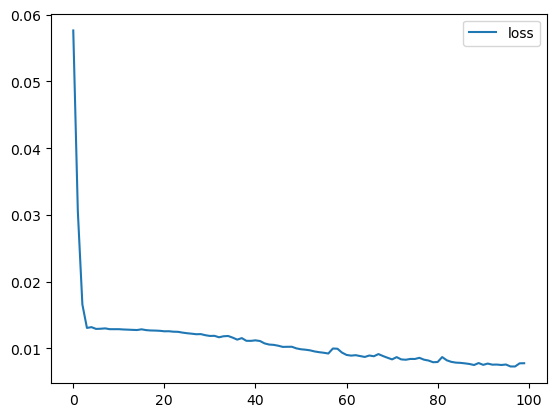

In [14]:
print('LOSS ERROR PLOT :')
Loss_df.plot()

In [15]:

print("MSE OF TEST TRAIN IS :   ")
model.evaluate(x_train, y_train, verbose = 0)


MSE OF TEST TRAIN IS :   


0.006974910385906696

In [16]:
print("MSE OF TEST DATA IS :   ")
model.evaluate(x_test, y_test, verbose = 0)

MSE OF TEST DATA IS :   


0.009830784983932972

In [18]:
# Assuming 'model.predict()' to get predictions
from sklearn.metrics import mean_squared_error

# Calculate MSE for training and testing datasets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print MAE and MSE for Training and Testing Data
print("MAE for Training Data: ", mae_train)
print("MAE for Testing Data: ", mae_test)
print("MSE for Training Data: ", mse_train)  # Fix: Added MSE for train
print("MSE for Testing Data: ", mse_test)  # Fix: mse_test is now defined


MAE for Training Data:  0.061279813215336106
MAE for Testing Data:  0.0745368837539293
MSE for Training Data:  0.006983536038486167
MSE for Testing Data:  0.009830785267268159


In [19]:

# Assume y_train and y_test are your actual target values for training and testing datasets.
# y_train_pred and y_test_pred are predictions from your model.

# Calculate the mean of the actual values
mean_train = np.mean(y_train)
mean_test = np.mean(y_test)

# Calculate MAE as previously described
mae_train = np.mean(np.abs(y_train_pred - y_train))
mae_test = np.mean(np.abs(y_test_pred - y_test))

# Convert MAE to percentage of the mean
mae_percentage_train = (mae_train / mean_train) * 100
mae_percentage_test = (mae_test / mean_test) * 100

# Print the results
print("MAE as a percentage for Training Data: {:.2f}%".format(mae_percentage_train))
print("MAE as a percentage for Testing Data: {:.2f}%".format(mae_percentage_test))

MAE as a percentage for Training Data: 25.91%
MAE as a percentage for Testing Data: 34.22%


In [32]:


# Calculate the mean of the actual values
mean_train = np.mean(y_train)
mean_test = np.mean(y_test)

# Calculate MAE (Mean Absolute Error)
mae_train = np.mean(np.abs(y_train_pred - y_train))
mae_test = np.mean(np.abs(y_test_pred - y_test))

# Calculate MSE (Mean Squared Error)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Convert MAE and MSE to percentages of the mean
mae_percentage_train = (mae_train / mean_train) * 100
mae_percentage_test = (mae_test / mean_test) * 100
mse_percentage_train = (mse_train / mean_train) * 100
mse_percentage_test = (mse_test / mean_test) * 100

# Print the results
print("\n🔹 **Model Performance Metrics** 🔹")
print("-------------------------------------------------")
print("MAE for Training Data: {:.6f}".format(mae_train))
print("MAE for Testing Data: {:.6f}".format(mae_test))
print("MAE as Percentage for Training Data: {:.2f}%".format(mae_percentage_train))
print("MAE as Percentage for Testing Data: {:.2f}%".format(mae_percentage_test))
print("-------------------------------------------------")
print("MSE for Training Data: {:.6f}".format(mse_train))
print("MSE for Testing Data: {:.6f}".format(mse_test))
print("MSE as Percentage for Training Data: {:.2f}%".format(mse_percentage_train))
print("MSE as Percentage for Testing Data: {:.2f}%".format(mse_percentage_test))
print("-------------------------------------------------")



🔹 **Model Performance Metrics** 🔹
-------------------------------------------------
MAE for Training Data: 0.061280
MAE for Testing Data: 0.074537
MAE as Percentage for Training Data: 25.91%
MAE as Percentage for Testing Data: 34.22%
-------------------------------------------------
MSE for Training Data: 0.006984
MSE for Testing Data: 0.009831
MSE as Percentage for Training Data: 2.95%
MSE as Percentage for Testing Data: 4.51%
-------------------------------------------------


In [19]:
#Best Models
#PL_20250318v1-------->65.006%
#PL_20250318v2--------->59.75%

In [20]:
model.save('E:\\SIMIN_NN\\PL_20250318v2.keras')


In [21]:
# agar khasti model ghadimi check kone esme model ghadimi ra load kon
# aslan save ra ham nam garar nade choon file jadid roye gadimi save mishavad
# report
# model PL_final25 ----> 63%
# model PL_final23 ----> 65%
##PL_20250318v1-------->65.006%
#PL_20250318v2--------->59.75%

In [21]:
# TEST MODEL
# Load the model
model = load_model(r'E:\\SIMIN_NN\\PL_20250318v2.keras')   #(r'E:\\SIMIN_NN\\PL_final23.keras' is the best model,Randeman for PL_final23.keras is 62%  )
#model = load_model(r'E:\\SIMIN_NN\\PL-Normal1.keras')
# Load and preprocess input data
#df_input = pd.read_csv('E:\\SIMIN_NN\\PT_TEST_INPUT.csv')

In [22]:
# Assuming train_df and test_df have the same columns, we take the column names from train_df
columns = test_df.columns.tolist()

# Create checkboxes for input selection
input_checkboxes = [widgets.Checkbox(value=False, description=column) for column in columns]
output_checkboxes = [widgets.Checkbox(value=False, description=column) for column in columns]

input_box = widgets.VBox(input_checkboxes)
output_box = widgets.VBox(output_checkboxes)

# Function to handle button click event for input selection
def on_input_button_clicked(b):
    selected_input_columns = [cb.description for cb in input_checkboxes if cb.value]
    global input_df  # Use global to use this outside the function if required
    input_df = test_df[selected_input_columns].copy()
    print("Selected input columns:", selected_input_columns)

# Function to handle button click event for output selection
def on_output_button_clicked(b):
    selected_output_columns = [cb.description for cb in output_checkboxes if cb.value]
    global output_df  # Use global to use this outside the function if required
    output_df = test_df[selected_output_columns].copy()
    print("Selected output columns:", selected_output_columns)

input_button = widgets.Button(description="Select Input")
output_button = widgets.Button(description="Select Output")

input_button.on_click(on_input_button_clicked)
output_button.on_click(on_output_button_clicked)

display(widgets.Label('SELECT INPUT'), input_box, input_button)
display(widgets.Label('SELECT OUTPUT'), output_box, output_button)

Label(value='SELECT INPUT')

Button(description='Select Input', style=ButtonStyle())

Label(value='SELECT OUTPUT')

Button(description='Select Output', style=ButtonStyle())

Selected input columns: ['age', 'gendera', 'BMI', 'hypertensive', 'glucose', 'RBC', 'PH', 'EF', 'COPD', 'CHD with no MI', 'Hyperlipemia', 'deficiencyanemias', 'depression']
Selected output columns: ['Platelets']


In [23]:
# output_df
df_output = output_df
df_input = input_df
df_output

,Platelets
639,0.281692
640,0.272816
641,0.186286
642,0.168932
643,0.100194
644,0.094822
645,0.308495
646,0.318447
647,0.188835
648,0.254104


In [24]:
#pd.set_option('display.max_rows', None)

df_output = df_output['Platelets'].values
df_output = pd.DataFrame(df_output, columns=['Platelets'])


In [25]:
PRIDICT = model.predict(df_input)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


In [26]:
df_predict = pd.DataFrame(PRIDICT, columns=['Predicted'])
df_predict

,Predicted
0,0.333252
1,0.293552
2,0.225230
3,0.207449
4,0.164990
5,0.220654
6,0.196956
7,0.189103
8,0.173894
9,0.207373


In [27]:

df_output = df_output * MX_PL
df_predict = df_predict * MX_PL

In [28]:
df_predict

,Predicted
0,343.249786
1,302.358490
2,231.987122
3,213.672882
4,169.939865
5,227.273911
6,202.865082
7,194.775909
8,179.110901
9,213.593689


In [29]:
df_output

,Platelets
0,290.142857
1,281.000000
2,191.875000
3,174.000000
4,103.200000
5,97.666667
6,317.750000
7,328.000000
8,194.500000
9,261.727273


In [30]:
df_ERR = 100 * abs((df_output.iloc[:, 0] - df_predict.iloc[:, 0]) / df_output.iloc[:, 0])

# # Create a new DataFrame for the accuracy
# df_ERR = Err.to_frame(name='Accuracy')
pd.set_option('display.max_rows', None)

ERR_AVE = df_ERR.mean()
ACC_AVE = 100 - ERR_AVE
print(df_ERR)


0      18.303718
1       7.600886
2      20.905340
3      22.800507
4      64.670412
5     132.703663
6      36.155757
7      40.617101
8       7.912133
9      18.390741
10    117.001921
11      2.989344
12     40.395774
13      0.644186
14     14.863928
15      1.394755
16     39.383857
17    161.692213
18     95.382955
19      7.556207
20    122.243370
21      1.390982
22      4.320442
23     26.235129
24      1.045890
25     10.411146
26     39.844085
27     63.767338
28     63.935707
29     27.990820
30     11.002180
31     57.265088
32      2.127519
33     20.146957
34      0.817608
35     11.630612
36     19.897596
37     44.961610
38     77.186679
39     26.119311
40     28.581717
41     16.147017
42     24.090166
43      0.747792
44     24.981033
45     49.748247
46     34.754747
47     52.685498
48     37.763633
49     27.907799
dtype: float64


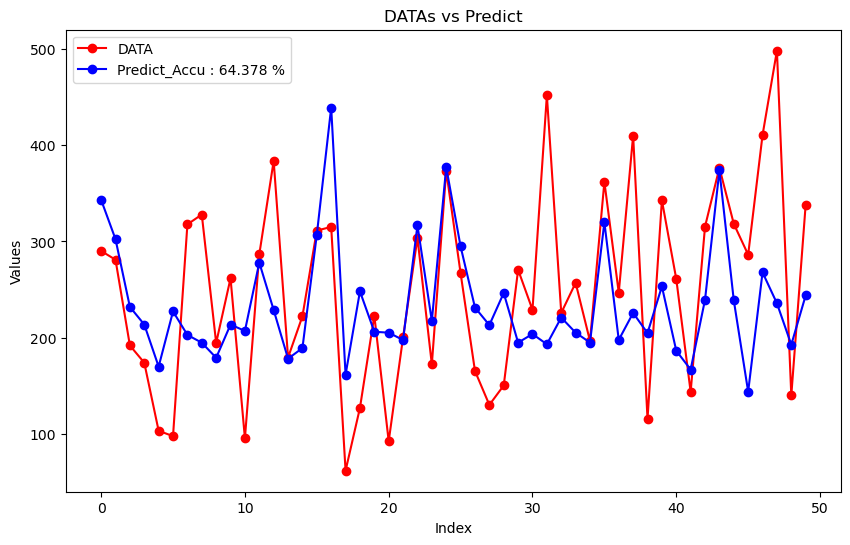

In [31]:
# Show the plot
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(df_output['Platelets'], color='red', label='DATA',  marker = 'o')
plt.plot(df_predict['Predicted'], color='blue', label=f"Predict_Accu : {ACC_AVE:.3f} %",  marker = 'o')

# Adding title and labels
plt.title('DATAs vs Predict')
plt.xlabel('Index')
plt.ylabel('Values')

# Adding a legend
plt.legend()

# Show the plot
plt.show()

Epoch 1/100


C:\Users\simin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0245 - val_loss: 0.0118
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0116 - val_loss: 0.0117
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0114 - val_loss: 0.0118
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0113 - val_loss: 0.0118
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0112 - val_loss: 0.0120
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0110 - val_loss: 0.0121
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0109 - val_loss: 0.0121
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0109 - val_loss: 0.0121
Epoch 9/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0108 - val_loss: 0.0122
Epoch 10/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0107 - val_loss: 0.0122
Epoch 11/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0106 - val_loss: 0.0124
Epoch 12/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0105 - val_lo

PermutationExplainer explainer: 139it [00:21,  3.38it/s]                                                                            
C:\Users\simin\AppData\Local\Temp\ipykernel_22564\2401243548.py:51: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)


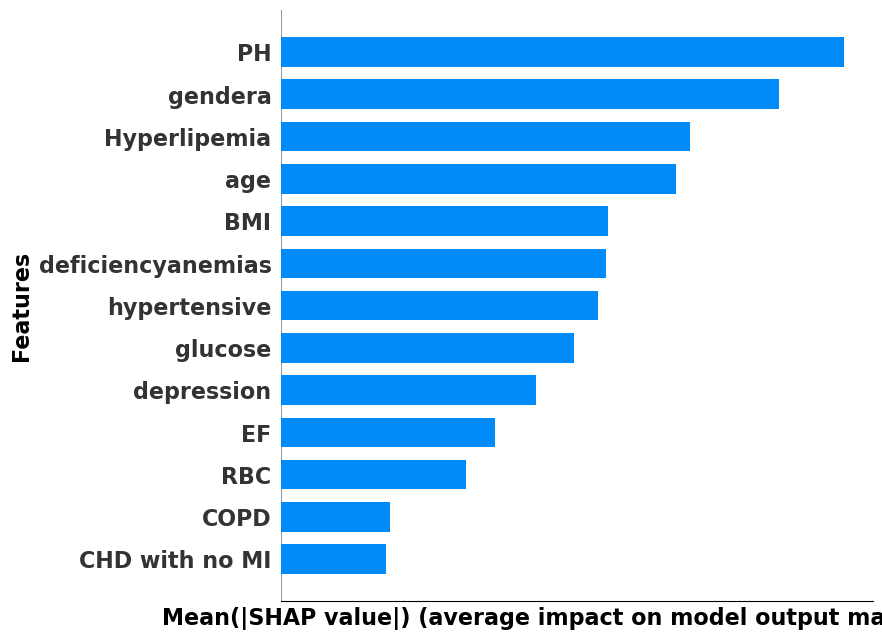

In [22]:
#SHAP Analysis, Feature Importance

import shap
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Load dataset (assuming df is already loaded)
X = data[['age', 'gendera', 'BMI', 'hypertensive', 'glucose', 'RBC', 'PH', 'EF', 'COPD', 
        'CHD with no MI', 'Hyperlipemia', 'deficiencyanemias', 'depression']]
y = data['Platelets']

# Fix random state for train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Neural Network Model
Input_Nodes = X_train.shape[1]
Output_Nodes = 1

model = Sequential()
model.add(Dense(2*Input_Nodes, activation='relu', input_shape=(Input_Nodes,)))  # First Hidden Layer
model.add(Dense(3*Input_Nodes, activation='relu'))
model.add(Dense(Input_Nodes, activation='relu'))
model.add(Dense(Input_Nodes, activation='softmax'))  # Softmax activation in the middle layer
model.add(Dense(Input_Nodes, activation='relu'))
model.add(Dense(Input_Nodes, activation='relu'))
model.add(Dense(round(Input_Nodes/2), activation='relu'))
model.add(Dense(Output_Nodes, use_bias=False))  # Output Layer

# Compile Model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train Model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1, validation_data=(X_test, y_test))

# Create SHAP Explainer
explainer = shap.Explainer(model, X_test)

# Compute SHAP values
shap_values = explainer(X_test)

# Visualize SHAP Feature Importance (Bar Chart)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)

# Customize axes labels and remove X-axis numbers
plt.xlabel("Mean(|SHAP value|) (average impact on model output magnitude)", fontsize=16, fontweight='bold')
plt.ylabel("Features", fontsize=16, fontweight='bold')

# Remove X-axis numbers
plt.xticks([])  # This removes the numbers on the X-axis
plt.yticks(fontsize=16, fontweight='bold')

plt.show()


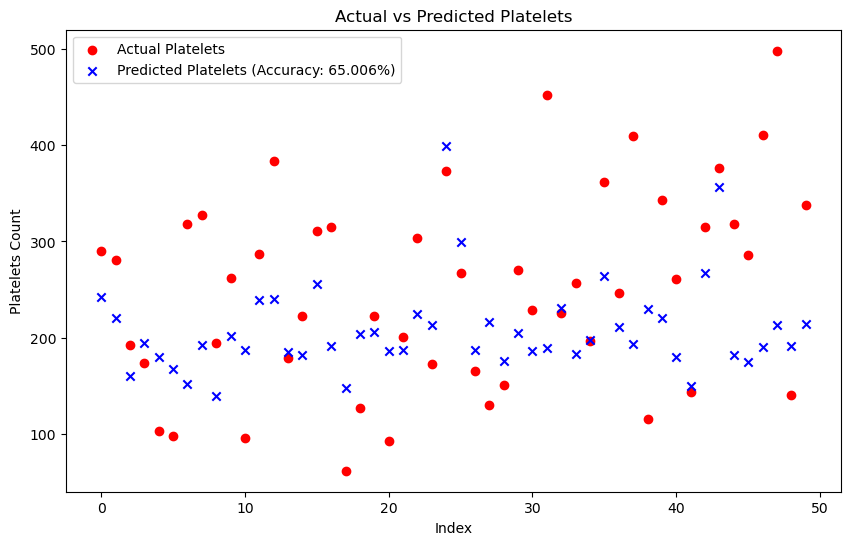

In [23]:


# Assuming df_output and df_predict are your actual and predicted data respectively,
# and ACC_AVE is the average accuracy you've calculated.

plt.figure(figsize=(10, 6))

# Scatter plot for actual Platelets values with 'o' as marker
plt.scatter(df_output.index, df_output['Platelets'], color='red', label='Actual Platelets', marker='o')

# Scatter plot for predicted Platelets values with 'x' as marker
plt.scatter(df_predict.index, df_predict['Predicted'], color='blue', label=f"Predicted Platelets (Accuracy: {ACC_AVE:.3f}%)", marker='x')

# Adding title and labels
plt.title('Actual vs Predicted Platelets')
plt.xlabel('Index')
plt.ylabel('Platelets Count')

# Adding a legend
plt.legend()

# Show the plot
plt.show()


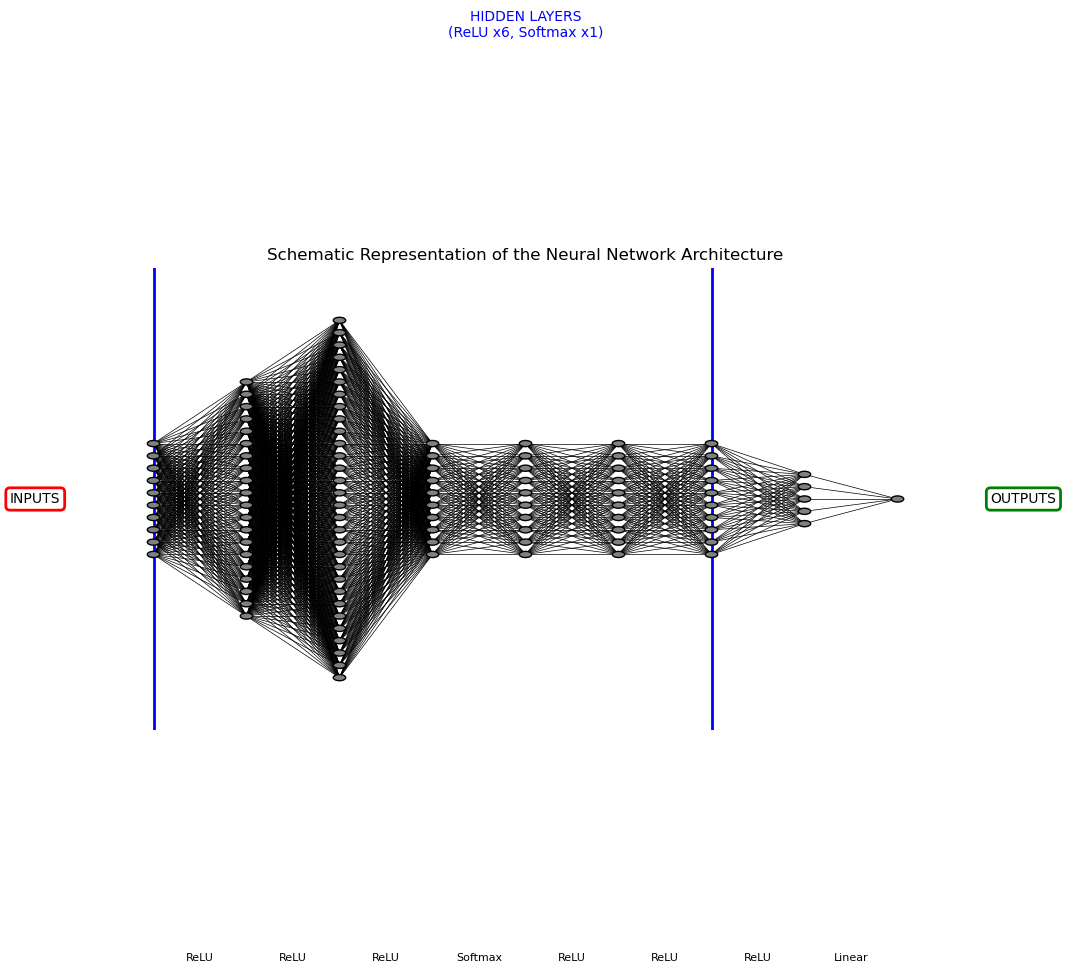

In [34]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_neural_net(ax, left, right, bottom, top, layer_sizes, activations):
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float((n_layers - 1))

    # Node coordinates
    node_positions = {}
    for i, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for j in range(layer_size):
            x = left + i*h_spacing
            y = layer_top - j*v_spacing
            node_positions[(i, j)] = (x, y)
            circle = plt.Circle((x, y), v_spacing/4., color='gray', ec='black', zorder=4)
            ax.add_artist(circle)

    # Draw connections
    for i in range(n_layers - 1):
        for j in range(layer_sizes[i]):
            for k in range(layer_sizes[i + 1]):
                x1, y1 = node_positions[(i, j)]
                x2, y2 = node_positions[(i + 1, k)]
                line = plt.Line2D([x1, x2], [y1, y2], c='black', lw=0.5)
                ax.add_artist(line)

    # Draw Labels
    ax.text(left - 0.1, (top + bottom) / 2, 'INPUTS', fontsize=10, va='center', ha='right', bbox=dict(boxstyle="round", facecolor='none', edgecolor='red', lw=2))
    ax.text(right + 0.1, (top + bottom) / 2, 'OUTPUTS', fontsize=10, va='center', ha='left', bbox=dict(boxstyle="round", facecolor='none', edgecolor='green', lw=2))
    
    # Hidden Layer label box
    ax.add_patch(patches.Rectangle(
        (left + h_spacing - 0.1, bottom - 0.5),
        (right - h_spacing*2) - (left + h_spacing - 0.1),
        (top - bottom) + 1,
        fill=False,
        edgecolor='blue',
        lw=2
    ))
    ax.text((left + right)/2, top + 0.6, 'HIDDEN LAYERS\n(ReLU x6, Softmax x1)', fontsize=10, ha='center', color='blue')

    # Add activation function labels
    for i, (layer_size, act) in enumerate(zip(layer_sizes[1:], activations)):
        ax.text(left + i*h_spacing + 0.5*h_spacing, bottom - 0.6, f'{act}', fontsize=8, ha='center', color='black')

    # Clean up
    ax.axis('off')

# Model architecture
layer_sizes = [
    10,        # Input layer (replace 10 with your actual input size if known)
    20,        # 2*Input_Nodes
    30,        # 3*Input_Nodes
    10,        # Input_Nodes
    10,        # Input_Nodes (softmax)
    10,        # Input_Nodes
    10,        # Input_Nodes
    5,         # Input_Nodes/2
    1          # Output layer
]

activations = [
    'ReLU',
    'ReLU',
    'ReLU',
    'Softmax',
    'ReLU',
    'ReLU',
    'ReLU',
    'Linear'
]

fig, ax = plt.subplots(figsize=(12, 6))
draw_neural_net(ax, .1, .9, .1, .9, layer_sizes, activations)
plt.title("Schematic Representation of the Neural Network Architecture", fontsize=12)
plt.show()
